In [1]:
import numpy as np, prjlib, healpy as hp, curvedsky as cs, tools_lens, tools_delens, tools_multitracer, pickle
from matplotlib.pyplot import *

In [54]:
snmin, snmax = 1, 100
nside = 256
lmax = 2*nside
lmin = 20
ntypes = ['base','base_iso','base_la','goal','goal_iso','goal_la']
v = 1.7e-7

In [45]:
d = prjlib.data_directory()
dobj = {}
for ntype in ntypes:
    Ntype = ntype.replace('_la','')+'_roll50'
    pobj = prjlib.analysis_init(t='la',freq='com',fltr='none',snmin=snmin,snmax=snmax,ntype=Ntype)
    if '_la' in ntype:
        pE = prjlib.analysis_init(t='la',freq='com',fltr='cinv',ntype=Ntype)
    else:
        pE = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype=Ntype.replace('_iso',''))
    qobj = tools_lens.init_qobj(pobj.stag,'False',rlmin=300,rlmax=4096)
    mobj = tools_multitracer.mass_tracer(pobj,qobj)
    dobj[ntype] = tools_delens.init_template(pobj.stag+qobj.ltag,mobj,pE,False,elmin=50)

In [46]:
dalm = pickle.load(open(dobj['base'].falm['comb'][1],"rb"))[0:lmax+1,0:lmax+1]
dalm[:lmin,:] = 0.

In [47]:
dmap = cs.utils.hp_alm2map(nside,lmax,lmax,dalm)

In [48]:
pid = prjlib.analysis_init(t='id',ntype='cv')
Balm = pickle.load(open(pid.fcmb.alms['o']['B'][1],"rb"))[:lmax+1,:lmax+1]
Balm[:lmin,:] = 0.

In [49]:
Bmap = cs.utils.hp_alm2map(nside,lmax,lmax,Balm)

In [50]:
W = prjlib.window('sa',nside=nside)[0] * prjlib.window('la',nside=nside)[0]
W[W==0] = np.nan

The loaded SAT mask is further multiplied by hit-count "binary" (not hit count itself)


/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 512
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [51]:
params = {
    'axes.labelsize': 16,
    'axes.titlesize': 28,
    'legend.fontsize': 14,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'text.usetex': True,
    'font.family': "Times New Roman", 
    'axes.titley':1.0,
    'axes.titlepad': -40,
    }
rcParams.update(params)

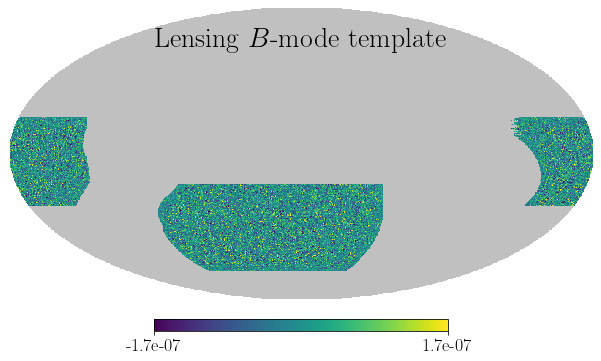

In [58]:
ax = hp.mollview(dmap*W,min=-v,max=v,title=r'Lensing $B$-mode template',badcolor='silver')
savefig('fig_bmap_template.pdf')

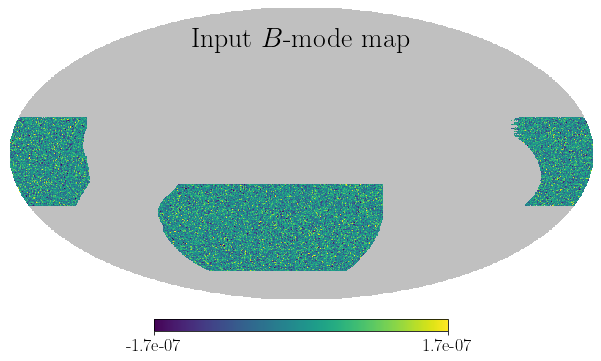

In [57]:
hp.mollview(Bmap*W*.7,min=-v,max=v,title=r'Input $B$-mode map',badcolor='silver')
savefig('fig_bmap_input.pdf')